### Data Spotlight: How Tourism Shapes Economic Growth — Insights from the TEI Dataset



#### Table of Contents

- Introduction
- Data Wrangling
- Exploratory Data Analysis (EDA)
- Result Interpretation
- Conclusion
- Limitation

## Introduction

Tourism has remained major contributor to a country’s Gross Domestic Product (GDP) over time. In 2024, tourism was estimated to contribute over 10% to global GDP through the creation of employment opportunities.

The tourism industry has consistently grown over the years. In 2024 alone, it provided jobs for over 348 million people worldwide, accounting for 1 in every 10 jobs globally.

The dataset we intend to analyze contains information on key tourism activities and economic indicators for over 200 countries, covering the period from 1999 to 2023. The dataset includes the following variables:

- Tourism Receipts: Total income a country generates from international tourism.

- Tourism Arrivals: Total number of international tourists entering a country.

- Tourism Expenditures: Amount of money spent by international tourists within a country.

- Tourism Exports: The percentage of a country’s total exports derived from international tourism receipts.

- Tourism Departures: Number of citizens or residents traveling abroad for tourism.

- GDP: Total value of all goods and services produced in a country.

- Inflation: Annual percentage change in the average price of goods and services in a country.

- Unemployment: Percentage of people within the labor force who are unemployed but actively seeking work.

All currency values are expressed in current US dollars.

Understanding the various factors influencing economic growth — and exploring the relationship between tourism and economic performance — is crucial in today’s global economy. This knowledge can help individuals, businesses, and governments make informed decisions. The tourism sector generates significant revenue and supports many industries, including retail, hospitality, financial services, and especially the transportation sector.

In this exploratory data analysis (EDA), we will address several key questions using the Tourism and Economic Impact (TEI) Dataset, sourced from the World Bank (via Kaggle). These include:

1. What is the relationship between tourism receipts and economic indicators such as inflation, unemployment, tourism expenditures, tourism arrivals, etc.?

2. What is the overall impact of tourism on economic growth?



In [226]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

In [227]:
# Here, the data is loaded for preprocessing and cleaning
data = pd.read_csv(r'C:\Users\HP\Desktop\End-to-End-Project\world_tourism_economy_data.csv')

In [229]:
data.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


In [231]:
# Let examine the number of rows and columns in the dataset
data.shape

(6650, 11)

In [232]:
# Let know more about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


#### From the information above, it shows that there are few issues with the dataset. These issues are;
  1. Correcting the datatype: for instance, the datatype of year is in an object that is a string, it should be changed from string to datetime
  2. There are also missing values. The identified issues will be addressed in the next section of the report.
  
     Furtherlet'st explore the summary information of the dataset

In [233]:
# Here, let's have descriptive statistics that summarize the central tendency, dispersion of the dataset
data.describe(include = 'all')

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,6650,6650,6650.000000,4.289000e+03,4.949000e+03,4114.000000,2.589000e+03,4173.000000,6.424000e+03,5668.000000,3658.000000
unique,266,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.000000,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
std,NaN,NaN,7.211645,1.291076e+11,2.049444e+08,17.758374,2.064665e+08,4.071632,7.761985e+12,18.682769,5.802565
min,NaN,NaN,1999.000000,1.000000e+05,9.000000e+02,0.000956,2.000000e+03,0.157818,1.396473e+07,-16.859691,0.039000
25%,NaN,NaN,2005.000000,2.690000e+08,5.290000e+05,4.657732,1.051000e+06,4.074702,6.087182e+09,1.865425,4.250000
50%,NaN,NaN,2011.000000,1.553000e+09,2.508000e+06,8.306797,4.634000e+06,5.754790,3.681803e+10,3.629433,6.548000
75%,NaN,NaN,2017.000000,9.144227e+09,1.818000e+07,18.506710,4.508703e+07,7.985102,4.266977e+11,6.563197,9.894692


#### The summary statistics provide us with vital information about the data. The following are extracted from the information above: 
    1. There is an issue of missing values, which is largely unacceptable
  
    2. The minimum inflation rate is showing -16% while we have 557%. This suggests the presence of an outlier. 
       The issues will be addressed in the data cleaning stage. Stay tuned!
       
    3. Drop unnecessary features: Any features that will add to the analysis will be dropped

    4. The value range is not suitable for all features in the dataset, so to manage the value range, we will apply a log to some variables.

### Data Cleaning
#### Here, the focus is on addressing the key issues identified. These issues include the following;
1. Correcting the Datatype: correcting the year datatype from string to datetime
   
2. Filling the missing values
   
3. Dropping unncessary features that do not add much to the analysis
   
4. Manage the variable value range: It will be unrealistic to run the regression with some variables having large value and others small. So we are scaling the value down by taking the log
5. We need to resolve the issue of outlier in the dataset. From what we see inflation rate cannot be 557%. This suggest largely the presence of outlier. So the IQR approach will deployed to resolve the issue of outlier. Let check and see the spear of the outlier

   Stay tune!
   

#### Correcting the Datatype

In [234]:
# To effect this correction we import the datetime
from datetime import datetime as dt
data['year'] = pd.to_datetime(data['year']) # Done

####  Filling the missing values

In [235]:
# Let's recall the various features that have missing values
data.isnull().sum()

country                    0
country_code               0
year                       0
tourism_receipts        2361
tourism_arrivals        1701
tourism_exports         2536
tourism_departures      4061
tourism_expenditures    2477
gdp                      226
inflation                982
unemployment            2992
dtype: int64

The tourism receipts, arrivals, exports, departures, expenditures, GDP, inflation, and unemployment all have missing values. These features are very vital to the analysis. The following approach could be applied.
1. Drop the nan
2. Use the median value to fill in the missing value
3. Use the mean value
4. Forward filling
5. backward filling
6. interpolation

In [38]:
# let drop the nan and see if the remaing data will be enough to for the analysis - Step 1
#data.dropna(inplace = True)
#data.isnull().sum()

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_departures      0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
dtype: int64

In [236]:
data.shape

(6650, 11)

With the above process we might lose important information about the dataset. Let's try using the median value to fill in the missing values

### Filling Missing Values using the median approach 

In [237]:
data['tourism_receipts']. fillna(data['tourism_receipts'].median(), inplace = True)

In [238]:
data['tourism_arrivals'].fillna(data['tourism_arrivals'].median(), inplace = True)

In [239]:
data['tourism_exports'].fillna(data['tourism_exports'].median(),inplace = True)

In [240]:
data['tourism_departures'].fillna(data['tourism_departures'].median(), inplace = True)

In [241]:
data['tourism_expenditures'].fillna(data['tourism_expenditures'].median(), inplace = True)

In [242]:
data['gdp'].fillna(data['gdp'].median(), inplace = True)

In [243]:
data['inflation'].fillna(data['inflation'].median(), inplace = True)

In [244]:
data['unemployment'].fillna(data['unemployment'].median(), inplace = True)

In [245]:
#
data.isnull().sum() # Done deal

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_departures      0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
dtype: int64

In [246]:
data.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1970-01-01 00:00:00.000001999,7.820000e+08,9.720000e+05,62.542949,4634000.0,9.495387,1.722905e+09,2.280372,6.548
1,Africa Eastern and Southern,AFE,1970-01-01 00:00:00.000001999,8.034209e+09,1.530938e+07,12.204030,4634000.0,7.760536,2.654293e+11,7.819865,6.548
2,Afghanistan,AFG,1970-01-01 00:00:00.000001999,1.553000e+09,2.508000e+06,8.306797,4634000.0,5.754790,3.681803e+10,3.629433,6.548
3,Africa Western and Central,AFW,1970-01-01 00:00:00.000001999,1.443613e+09,3.897975e+06,3.974476,4634000.0,6.147291,1.394683e+11,0.372266,6.548
4,Angola,AGO,1970-01-01 00:00:00.000001999,3.100000e+07,4.500000e+04,0.583858,4634000.0,2.489638,6.152923e+09,248.195902,6.548


### Drop unnecessary columns

In [248]:
# Here I decided to drop the country code columns as this won't add much to the analysis
data.drop(columns = ['country_code'], inplace = True) # Done Deal

In [251]:
data['inflation'].max()

np.float64(557.201817362051)

### Let's checking for Outlier in the suspected column - inflation

In [252]:
    Q1 = data['inflation'].quantile(0.25)
    Q3 = data['inflation'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data['inflation'] < lower_bound) | (data['inflation'] > upper_bound)]

    print(f"Outliers in '{'inflation'}':")
    print(outliers)
    print("------")

Outliers in 'inflation':
                                            country  \
4                                            Angola   
15                                       Azerbaijan   
25                                          Belarus   
43                                 Congo, Dem. Rep.   
64    Europe & Central Asia (excluding high income)   
...                                             ...   
6598                                         Serbia   
6603                          Sao Tome and Principe   
6604                                       Suriname   
6628                                        Turkiye   
6632                                        Ukraine   

                              year  tourism_receipts  tourism_arrivals  \
4    1970-01-01 00:00:00.000001999      3.100000e+07      4.500000e+04   
15   1970-01-01 00:00:00.000001999      9.300000e+07      6.020000e+05   
25   1970-01-01 00:00:00.000001999      9.200000e+07      2.508000e+06   
43   1970-01-01 00

The output above show the spear and the extent of outlier. Let resolve this problem by replacing the outlier with the median values

### Resolving the issue of the outiler identified: replacing the outlier with the median value

In [253]:
 median_value = data['inflation'].median()

# Replace outliers with the median
data['inflation'] = data['inflation'].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)

In [254]:
# Let quickly check 
data['inflation'].max()

np.float64(11.1863409441067)

In [255]:
data.head()

,country,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,1970-01-01 00:00:00.000001999,7.820000e+08,9.720000e+05,62.542949,4634000.0,9.495387,1.722905e+09,2.280372,6.548
1,Africa Eastern and Southern,1970-01-01 00:00:00.000001999,8.034209e+09,1.530938e+07,12.204030,4634000.0,7.760536,2.654293e+11,7.819865,6.548
2,Afghanistan,1970-01-01 00:00:00.000001999,1.553000e+09,2.508000e+06,8.306797,4634000.0,5.754790,3.681803e+10,3.629433,6.548
3,Africa Western and Central,1970-01-01 00:00:00.000001999,1.443613e+09,3.897975e+06,3.974476,4634000.0,6.147291,1.394683e+11,0.372266,6.548
4,Angola,1970-01-01 00:00:00.000001999,3.100000e+07,4.500000e+04,0.583858,4634000.0,2.489638,6.152923e+09,3.629433,6.548


## Exploratory Data Analysis

##### Here, we are going to explore the clean data to answer some key questions and also uncover insights from the dataset. We are going achieve this objective using statistical computation and visuals. Recall the questions - 

##### What is the relationship between tourism receipts and economic indicators such as inflation, unemployment, tourism expenditures, tourism     arrivals, etc.?
    
##### What is the overall impact of tourism on economic growth?

##### Exploring the relationship between tourism receipts and economic indicators such as inflation, unemployment, tourism expenditures, tourism arrivals

##### We are going to achieve this using correlation coefficents, plots like scatterplot,histrogram among other

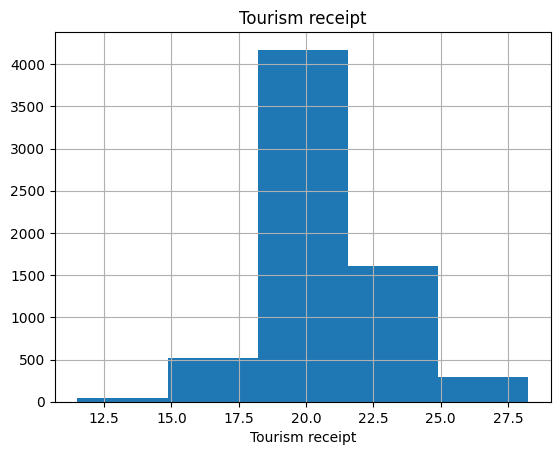

In [256]:
data['log_tourism_receipts'] = np.log(data['tourism_receipts']) # Taking the natural log to scale the value down

# Plotting the histrogram
data['log_tourism_receipts'].hist(bins =5)
plt.title('Tourism receipt')
plt.xlabel ('Tourism receipt')
plt.show()

#### i.Relationship between  Tourism Receipt and Tourism Arrivals'

[[1.         0.86987104]
 [0.86987104 1.        ]]


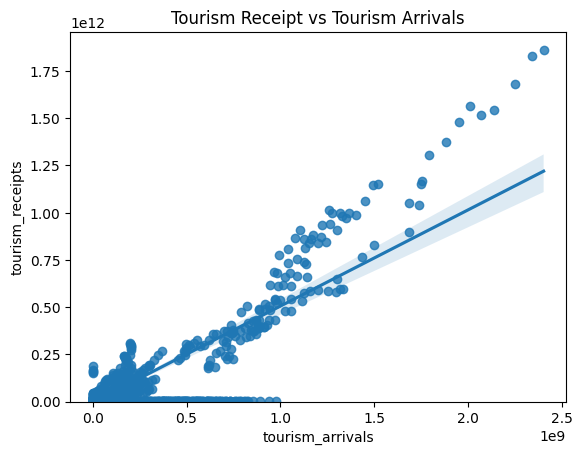

In [257]:
# To print the correction coefficients

tr = np.array(data['tourism_receipts'])
ta = np.array(data['tourism_arrivals'])
print(np.corrcoef(tr, ta))

#Ploting the scatterplot(regplot)

sns.regplot(data = data, x = 'tourism_arrivals', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs Tourism Arrivals')
plt.show()


### iii Investigating the relationship between Tourism Receipt and Tourism_Departures

[[1.         0.85801947]
 [0.85801947 1.        ]]


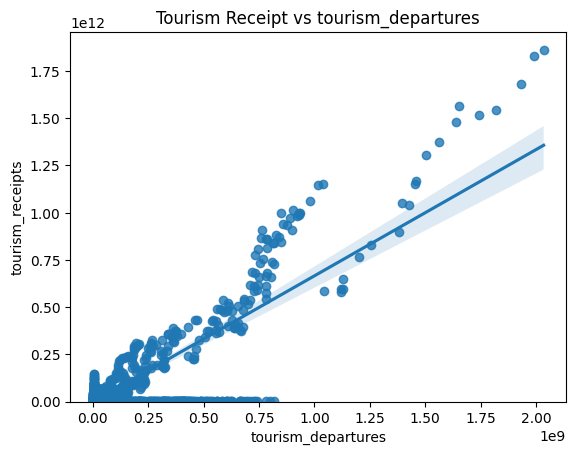

In [258]:
# To print the correction coefficients

tr = np.array(data['tourism_receipts'])
td = np.array(data['tourism_departures'])
print(np.corrcoef(tr, td))

#Ploting the scatterplot(regplot)

sns.regplot(data = data, x = 'tourism_departures', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs tourism_departures')
plt.show()

### Looking at the relationship Tourism Receipt between GDP

[[1.         0.72886529]
 [0.72886529 1.        ]]


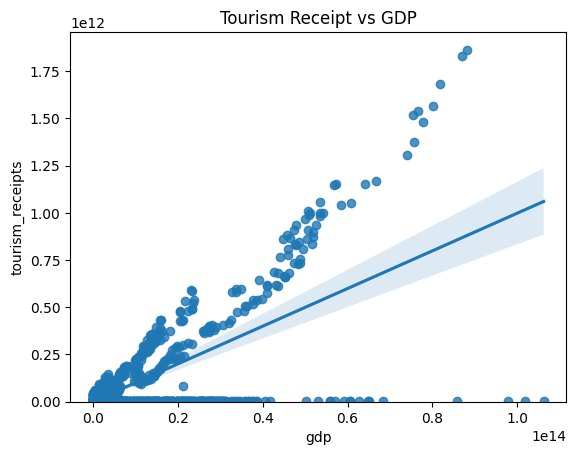

In [259]:
# Let's Print the correlation coefficients
tr = np.array(data['tourism_receipts'])
gdp = np.array(data['gdp'])
print(np.corrcoef(tr, gdp))

# Casting the plot
sns.regplot(data = data, x= 'gdp', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs GDP')
plt.show()

#### ii. Exploring the relationship between Tourism Receipt and Tourism_Exports

[[ 1.         -0.06776988]
 [-0.06776988  1.        ]]


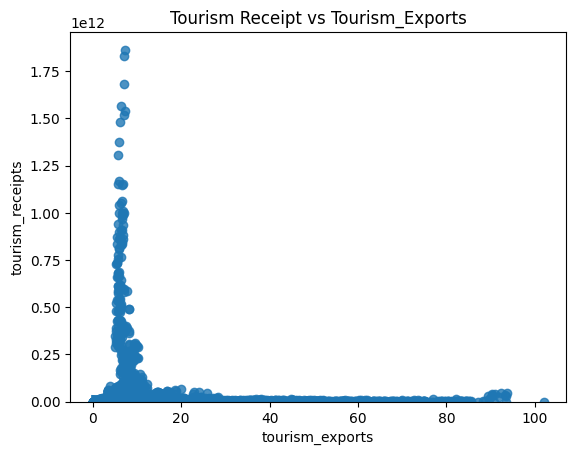

In [260]:
# Let's Print the correlation coefficients
tr = np.array(data['tourism_receipts'])
ts = np.array(data['tourism_exports'])
print(np.corrcoef(tr, ts))

# Casting the plot
sns.regplot(data = data, x= 'tourism_exports', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs Tourism_Exports')
plt.show()

### iv Investigating the relationship between Tourism Receipt and Tourism_Expenditures

[[ 1.        -0.0220146]
 [-0.0220146  1.       ]]


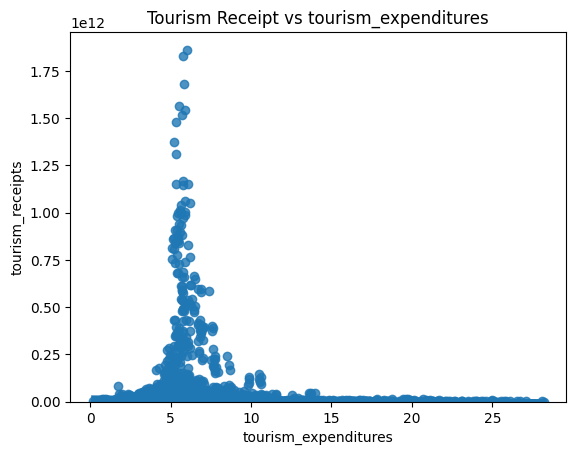

In [261]:
# To print the correction coefficients

tr = np.array(data['tourism_receipts'])
te = np.array(data['tourism_expenditures'])
print(np.corrcoef(tr, te))

#Ploting the scatterplot(regplot)

sns.regplot(data = data, x = 'tourism_expenditures', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs tourism_expenditures')
plt.show()

### v. Investigate the relationship between Tourism Receipt and Inflation

[[ 1.         -0.08249088]
 [-0.08249088  1.        ]]


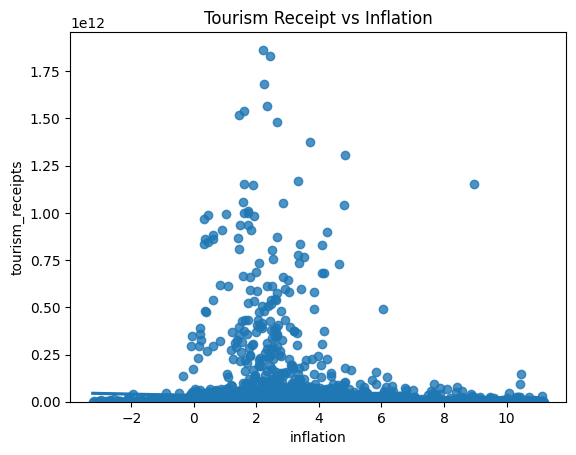

In [262]:
# To print the correction coefficients

tr = np.array(data['tourism_receipts'])
inf = np.array(data['inflation'])
print(np.corrcoef(tr, inf))

#Ploting the scatterplot(regplot)

sns.regplot(data = data, x = 'inflation', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs Inflation')
plt.show()

### vi Exploring the relationship between Tourism Receipt and Unemployment

[[ 1.         -0.01304156]
 [-0.01304156  1.        ]]


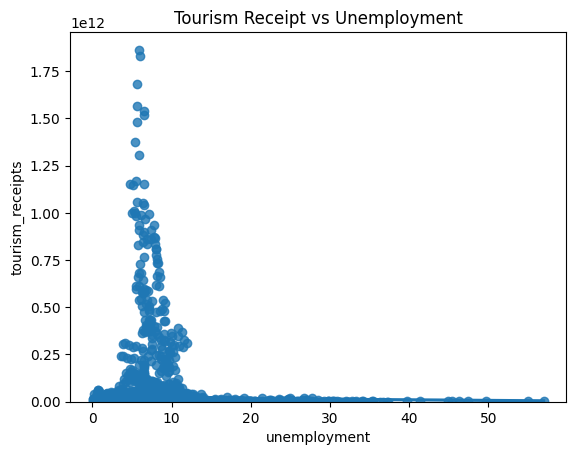

In [263]:
# To print the correction coefficients

tr = np.array(data['tourism_receipts'])
une = np.array(data['unemployment'])
print(np.corrcoef(tr, une))

#Ploting the scatterplot(regplot)

sns.regplot(data = data, x = 'unemployment', y = 'tourism_receipts')
plt.ylim(0)
plt.title('Tourism Receipt vs Unemployment')
plt.show()

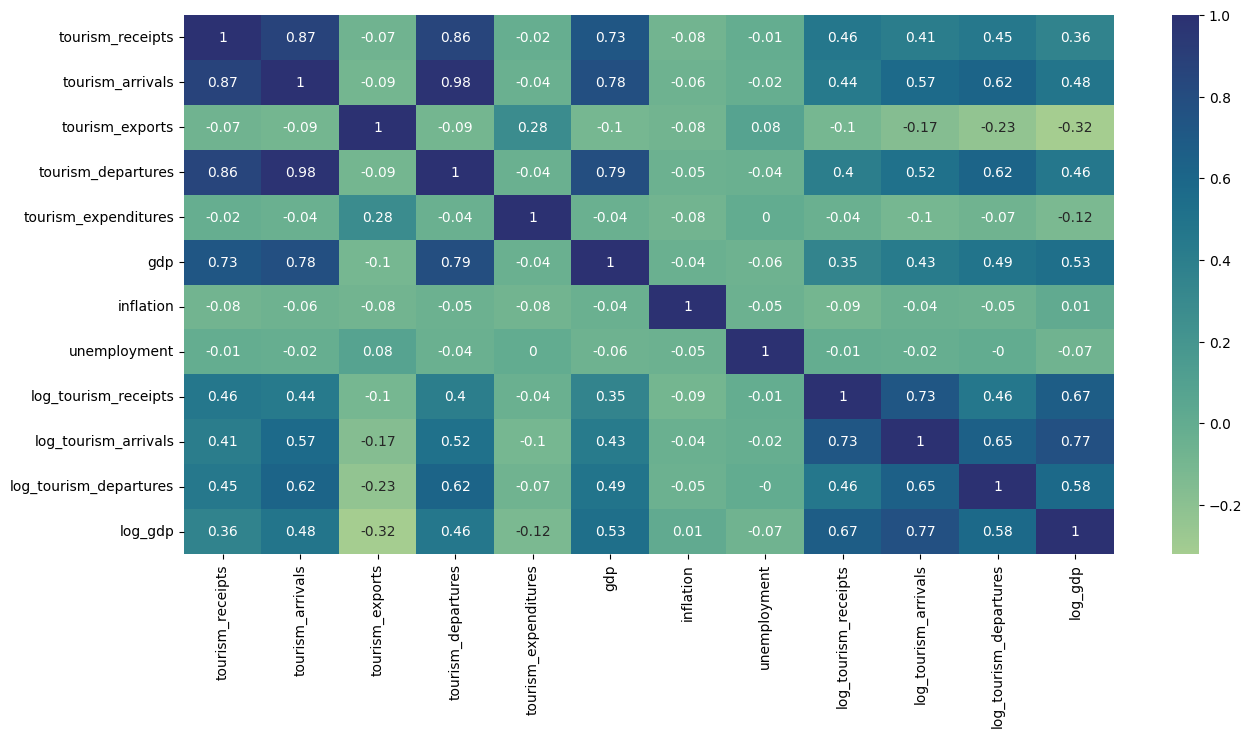

In [282]:
### Here we let's visualize the entire relationship using heatmap
exclud_col = ['year', 'country']

vis_data = data.drop(columns = exclud_col, axis =1) # To exlude the year year feature

# Showing the heatmap
plt.figure(figsize = (15,7))
sns.heatmap(round(vis_data.corr(), 2), annot = True, cmap = "crest")
plt.show()



### Interpretation
From the result above, the correlation and scatterplot, which was visualized with the heatmap, shows that there is a positive relationship between tourism receipt(revenue) and tourism_arrivals, tourism_departures, and GDP. 

While a negative relationship exists between tourism receipts (revenue) and tourism exports, tourism expenditures, inflation, and unemployment. It is vital to know that correlation does not in any way imply causality. 

Is the positive relationship desirable or ideal?
What about the negative relationship?

### What is the overall impact of tourism on economic growth?
To answer this question, we are going to run the multiple linear regression using the Ordinary Least Squares (OLS) approach

In [275]:
# Taking the natural log of each of their features to scale the value down
data['log_tourism_arrivals'] = np.log(data['tourism_arrivals'])
data['log_tourism_departures'] = np.log(data['tourism_departures'])
data['log_gdp'] = np.log(data['gdp'])

# Splitting the date into target  and exploratory variables

Y = data['log_gdp']
Z = data[['log_tourism_arrivals', 'log_tourism_departures',  'log_tourism_receipts', 'tourism_exports', 'tourism_expenditures', 'inflation', 'unemployment' ]]

In [279]:
# Import the needed libraries

import statsmodels.api as sm
Reg1output = sm.OLS(Y, Z).fit() # Fitting the model
print(Reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1910.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:55:29   Log-Likelihood:                -12938.
No. Observations:                6650   AIC:                         2.589e+04
Df Residuals:                    6642   BIC:                         2.595e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Let's add the constant parameters because the relationship in the real world is not always linear or exact
This is because other factors influence economic growth that may not be captured by the model. Relationships in the real world are not always linear or exact

In [280]:
# Running the model with by adding the contant parameters - centering
import statsmodels.api as sm
Z = sm.add_constant(Z)
reg2output =sm.OLS(Y,Z).fit()
print(reg2output.summary())

                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1910.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:55:32   Log-Likelihood:                -12938.
No. Observations:                6650   AIC:                         2.589e+04
Df Residuals:                    6642   BIC:                         2.595e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

## Result Interpretation

From the regression output(both Reg1output and Reg2output) above, it is evident that variables such as tourism_receipts, tourism_arrivals,  tourism_exports, tourism_departures, tourism_expenditures, inflation, and unemployment are significant factors that influence economic growth. This individual P-value informs this decision as the P-values are less than 0.05 (that is, 5% level of significance).

From the first regression result, we assumed a linear or exact relationship between economic growth and the explanatory variables. This assumption is unrealistic, as an ideal relationship in the real world is not always exact. When we made the assumption, the computed R-Squared was 0.99, which tells us that 95% variation  or changes in economic growth can be explained by the independent variables

In the second regression result, we do not assume an exact relationship. The computed R-Squared was 0.668, which tells us that 67% variation  or changes in economic growth can be explained by the independent variables. We can also confidently say that the over model is statistical significant as the Prob of F-statistic is less than 0.05.


## Conclusion

- In this analysis, I explored the Tourism and Economic Impact dataset. As part of the exploratory data analysis(EDA), I did data cleaning such as correcting the datatime from string to datetime, finding and replacing missing values, detecting and resolving the issue of outliers, and managing the data range values by adjusting the values. This process enriched the healthy data analysis.

- Secondly, the dataset was explored mainly to gain insights of the various relationships that exist between tourism and economic indictors.This was achieved using correlation coefficient analysis and scatterplot

- Finally, I also explored the Ordinary Least Squares (OLS) approach for the regression analysis. The result showed hat variables such as   tourism_receipts, tourism_arrivals, tourism_exports, tourism_departures, tourism_expenditures, inflation, and unemployment are significant factors that influence economic growth.

## Limitation

- I was not able to extract country-specific information
  
- Could I have used a different approach for filling in the missing values
  
- Could I have applied different modell